In [525]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import torch
from torchvision.transforms import ToTensor, Normalize
from dataset import SegmentationDataset
from models.vcn_32 import VCN32
from models.vcn_16 import VCN16
from models.vcn_8 import VCN8
import matplotlib.pyplot as plt

In [13]:
dataset = SegmentationDataset(root="data/stage1_train")

In [14]:
data = dataset[2]

In [15]:
img = data[0]
label = data[1]

In [16]:
x = ToTensor()(img).unsqueeze(0)
y = ToTensor()(label)[0, :].unsqueeze(0).long()

x.shape, y.shape

(torch.Size([1, 3, 256, 320]), torch.Size([1, 256, 320]))

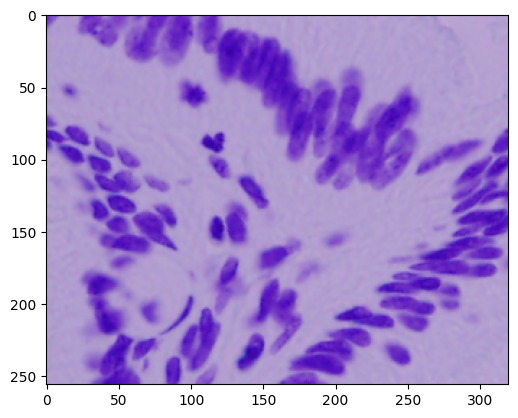

In [17]:
plt.imshow(x[0].permute(1, 2, 0))

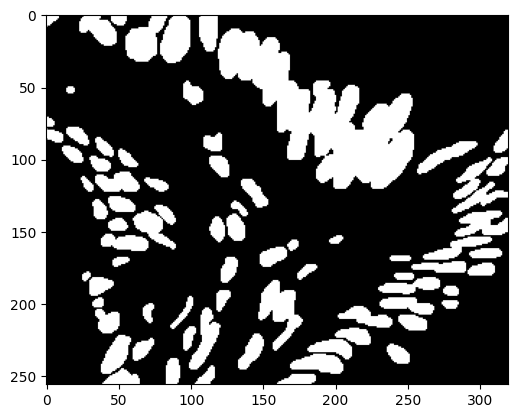

In [18]:
plt.imshow(y[0], cmap="gray")

# Training 1 Datapoint

In [29]:
torch.mps.empty_cache()

In [30]:
device = torch.device("mps")

In [31]:
vcn8 = VCN8(pretrained=True).to(device)
# vcn16 = VCN16(num_classes=2, pretrained=True, freeze_pretrained=False).to(device)
# vcn32 = VCN32(num_classes=2, pretrained=True).to(device)
model = vcn8

PRETRAINED


In [32]:
EPOCHS = 250
LR = 3e-4

cross_entropy = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(vcn32.parameters(), lr=LR, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [62]:
losses = []

x = x.to(device)
y = y.to(device)

for epoch in range(EPOCHS):
    pred = model(x)
    loss = cross_entropy(pred, y)
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    print(f"[Epoch {epoch+1}/{EPOCHS}]: Loss={loss.item()}")

[Epoch 1/250]: Loss=0.039112117141485214
[Epoch 2/250]: Loss=0.03957444056868553
[Epoch 3/250]: Loss=0.04020814225077629
[Epoch 4/250]: Loss=0.041130196303129196
[Epoch 5/250]: Loss=0.041859742254018784
[Epoch 6/250]: Loss=0.0418965220451355
[Epoch 7/250]: Loss=0.04124557971954346
[Epoch 8/250]: Loss=0.04047244414687157
[Epoch 9/250]: Loss=0.03964858874678612
[Epoch 10/250]: Loss=0.0388091616332531
[Epoch 11/250]: Loss=0.038535356521606445
[Epoch 12/250]: Loss=0.03907611966133118
[Epoch 13/250]: Loss=0.04010623320937157
[Epoch 14/250]: Loss=0.04112907871603966
[Epoch 15/250]: Loss=0.04164782166481018
[Epoch 16/250]: Loss=0.04074888303875923
[Epoch 17/250]: Loss=0.03940591961145401
[Epoch 18/250]: Loss=0.03861583396792412
[Epoch 19/250]: Loss=0.038805849850177765
[Epoch 20/250]: Loss=0.03985089808702469
[Epoch 21/250]: Loss=0.040426068007946014
[Epoch 22/250]: Loss=0.04010091349482536
[Epoch 23/250]: Loss=0.03934377059340477
[Epoch 24/250]: Loss=0.038739632815122604
[Epoch 25/250]: Loss

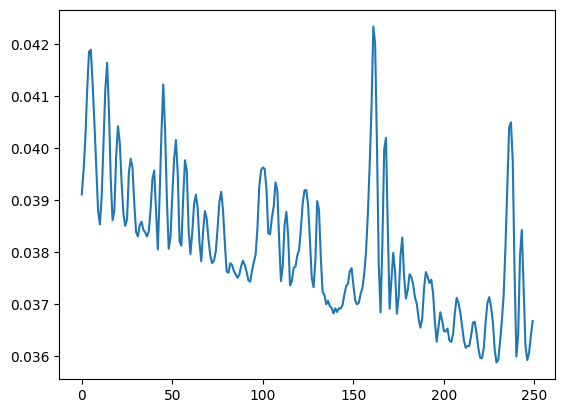

In [63]:
plt.plot(range(EPOCHS), losses)

In [64]:
pred.shape

torch.Size([1, 2, 256, 320])

In [65]:
predicted_class = torch.argmax(pred, dim=1)

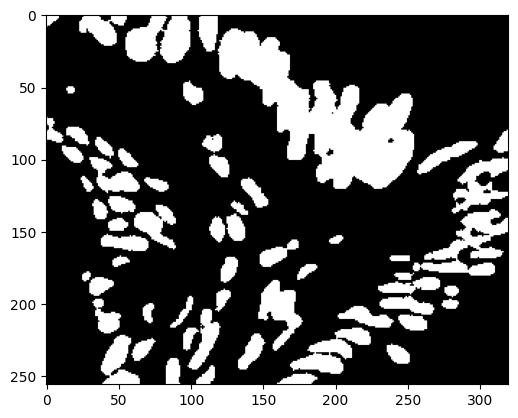

In [66]:
plt.imshow(predicted_class[0].cpu().detach().numpy(), cmap="gray")

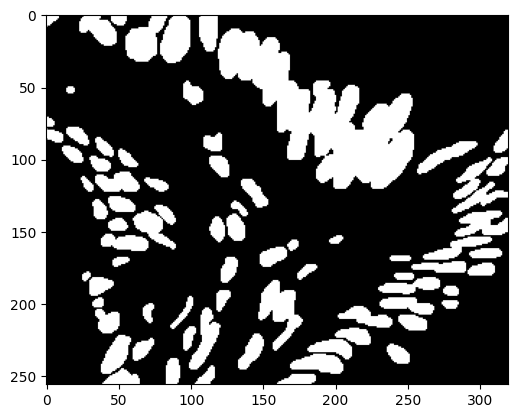

In [67]:
plt.imshow(y[0].cpu().detach().numpy(), cmap="gray")